# Further analysis of window size

We carried out additional experiments studying the effect of window size, not shown in the poster because of space considerations. 
These include the same effective window size used in [Steinfath et al 2021](https://elifesciences.org/articles/68837#s2) to train models on this dataset, as well as other larger window sizes. As the figures below show, our result holds across this wider range of sizes that there's a direct relationship between window size and performance, effectively across all metrics. For this dataset, this effect seems to saturate around the largest window size we used on the poster, 2000 time bins.

In [1]:
cd /home/ildefonso/Documents/repos/vocalpy/Nicholson-Cohen-SfN-2023-poster/

/home/ildefonso/Documents/repos/vocalpy/Nicholson-Cohen-SfN-2023-poster


/home/ildefonso/Documents/repos/vocalpy/Nicholson-Cohen-SfN-2023-poster/.venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
from dataclasses import dataclass

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
data = pd.read_csv('./results/summary-data-window-size-experiments.csv')

In [4]:
@dataclass
class MetricPlot:
    metric: str
    ascending: bool
    ylims: tuple[list[int]]
    save_fname: str
    legend_loc: str

In [5]:
metrics_plots = (
    MetricPlot(
        metric='Frame Error (%)',
        ascending=True,
        ylims=([0., 4.5], [0., 3.25]),
        save_fname='window-size-frame-error',
        legend_loc='lower right',
    ),
    MetricPlot(
        metric='Character Error Rate (%)',
        ascending=True,
        ylims=([0., 150.], [0., 10]),
        save_fname='window-size-character-error-rate',
        legend_loc='upper right',
    ),
    MetricPlot(
        metric='Precision (%)',
        ascending=False,
        ylims=([50, 100], [90, 100]),
        save_fname='window-size-precision',
        legend_loc='lower right',
    ),
    MetricPlot(
        metric='Recall (%)',
        ascending=False,
        ylims=([90, 100], [90, 100]),
        save_fname='window-size-recall',
        legend_loc='lower right',
    ),
    MetricPlot(
        metric='$F$-score (%)',
        ascending=False,
        ylims=([70, 100], [90, 100]),
        save_fname='window-size-fscore',
        legend_loc='lower right',
    ),
)

In [6]:
sns.set()
sns.set_context('poster', font_scale=1.5)

In [7]:
def condition(row):
    window_size = row['Window Size']
    postprocess = row['Post-processing']
    condition_str = f'Window Size {window_size}'
    if postprocess:
        condition_str += ' with clean-ups'
    return condition_str

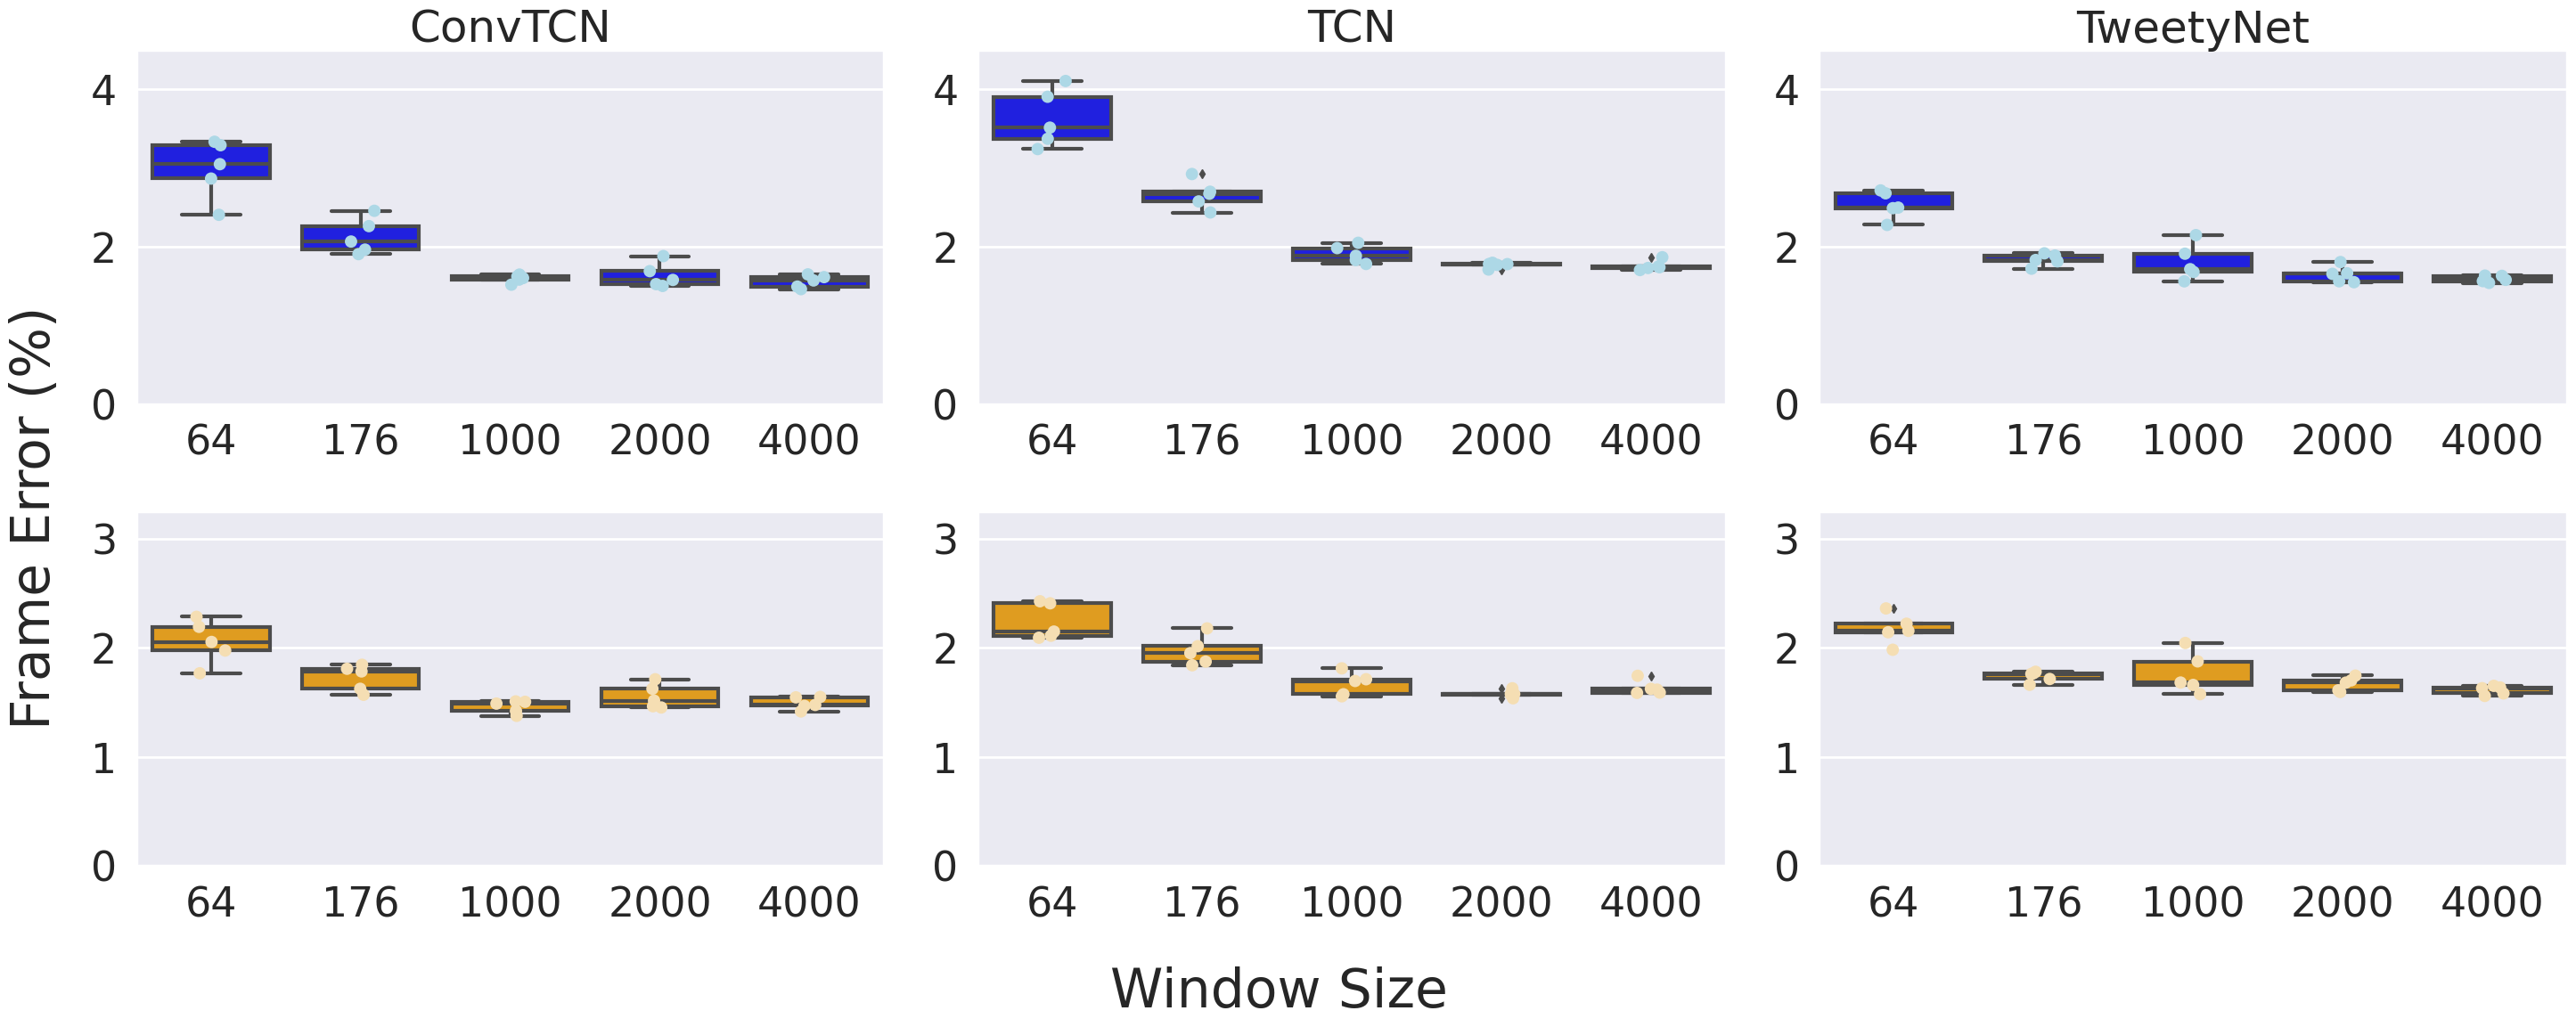

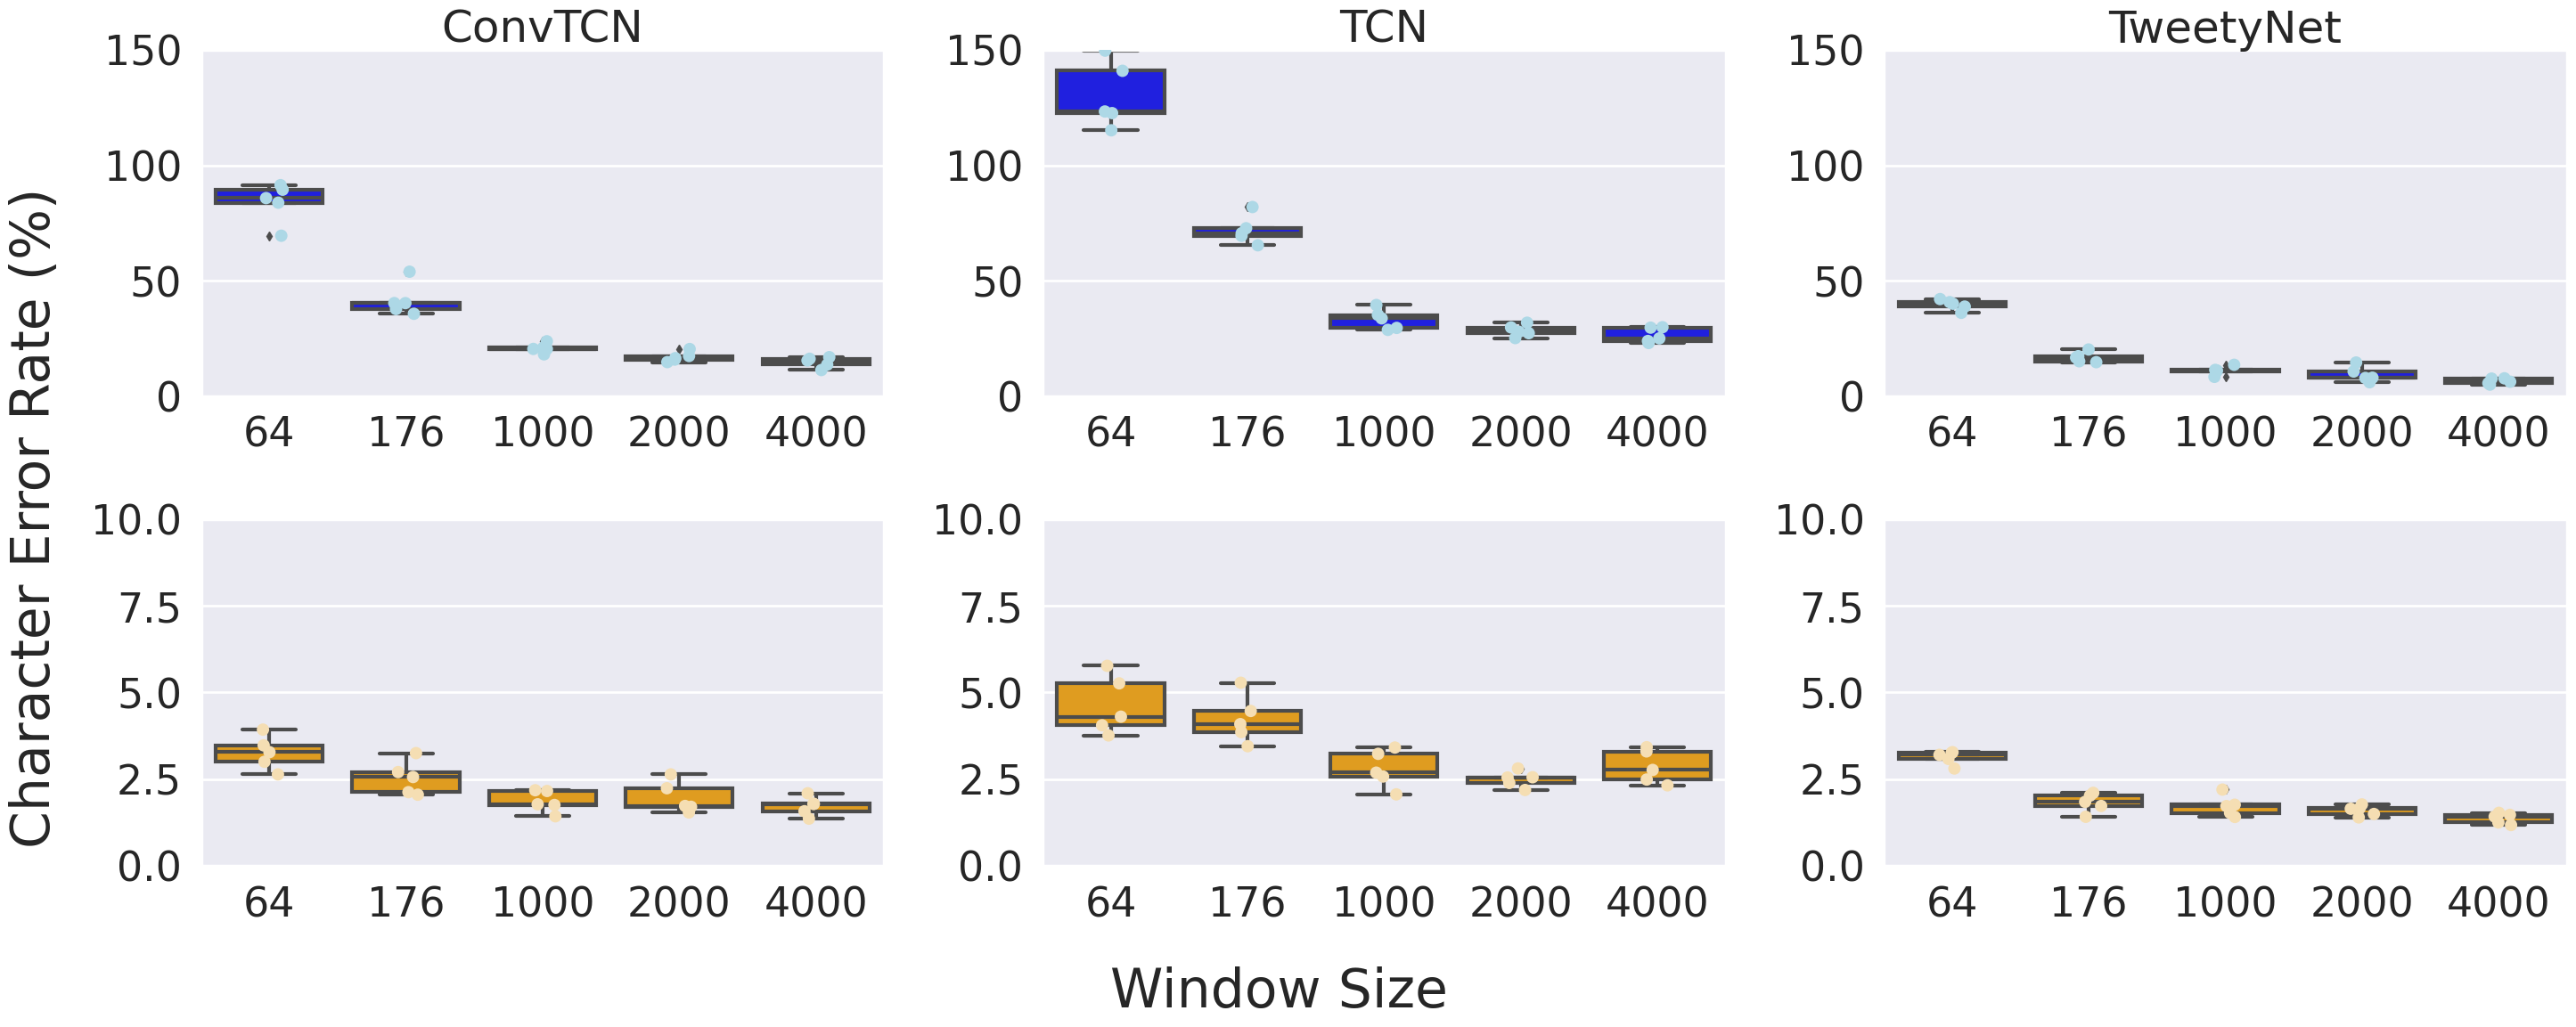

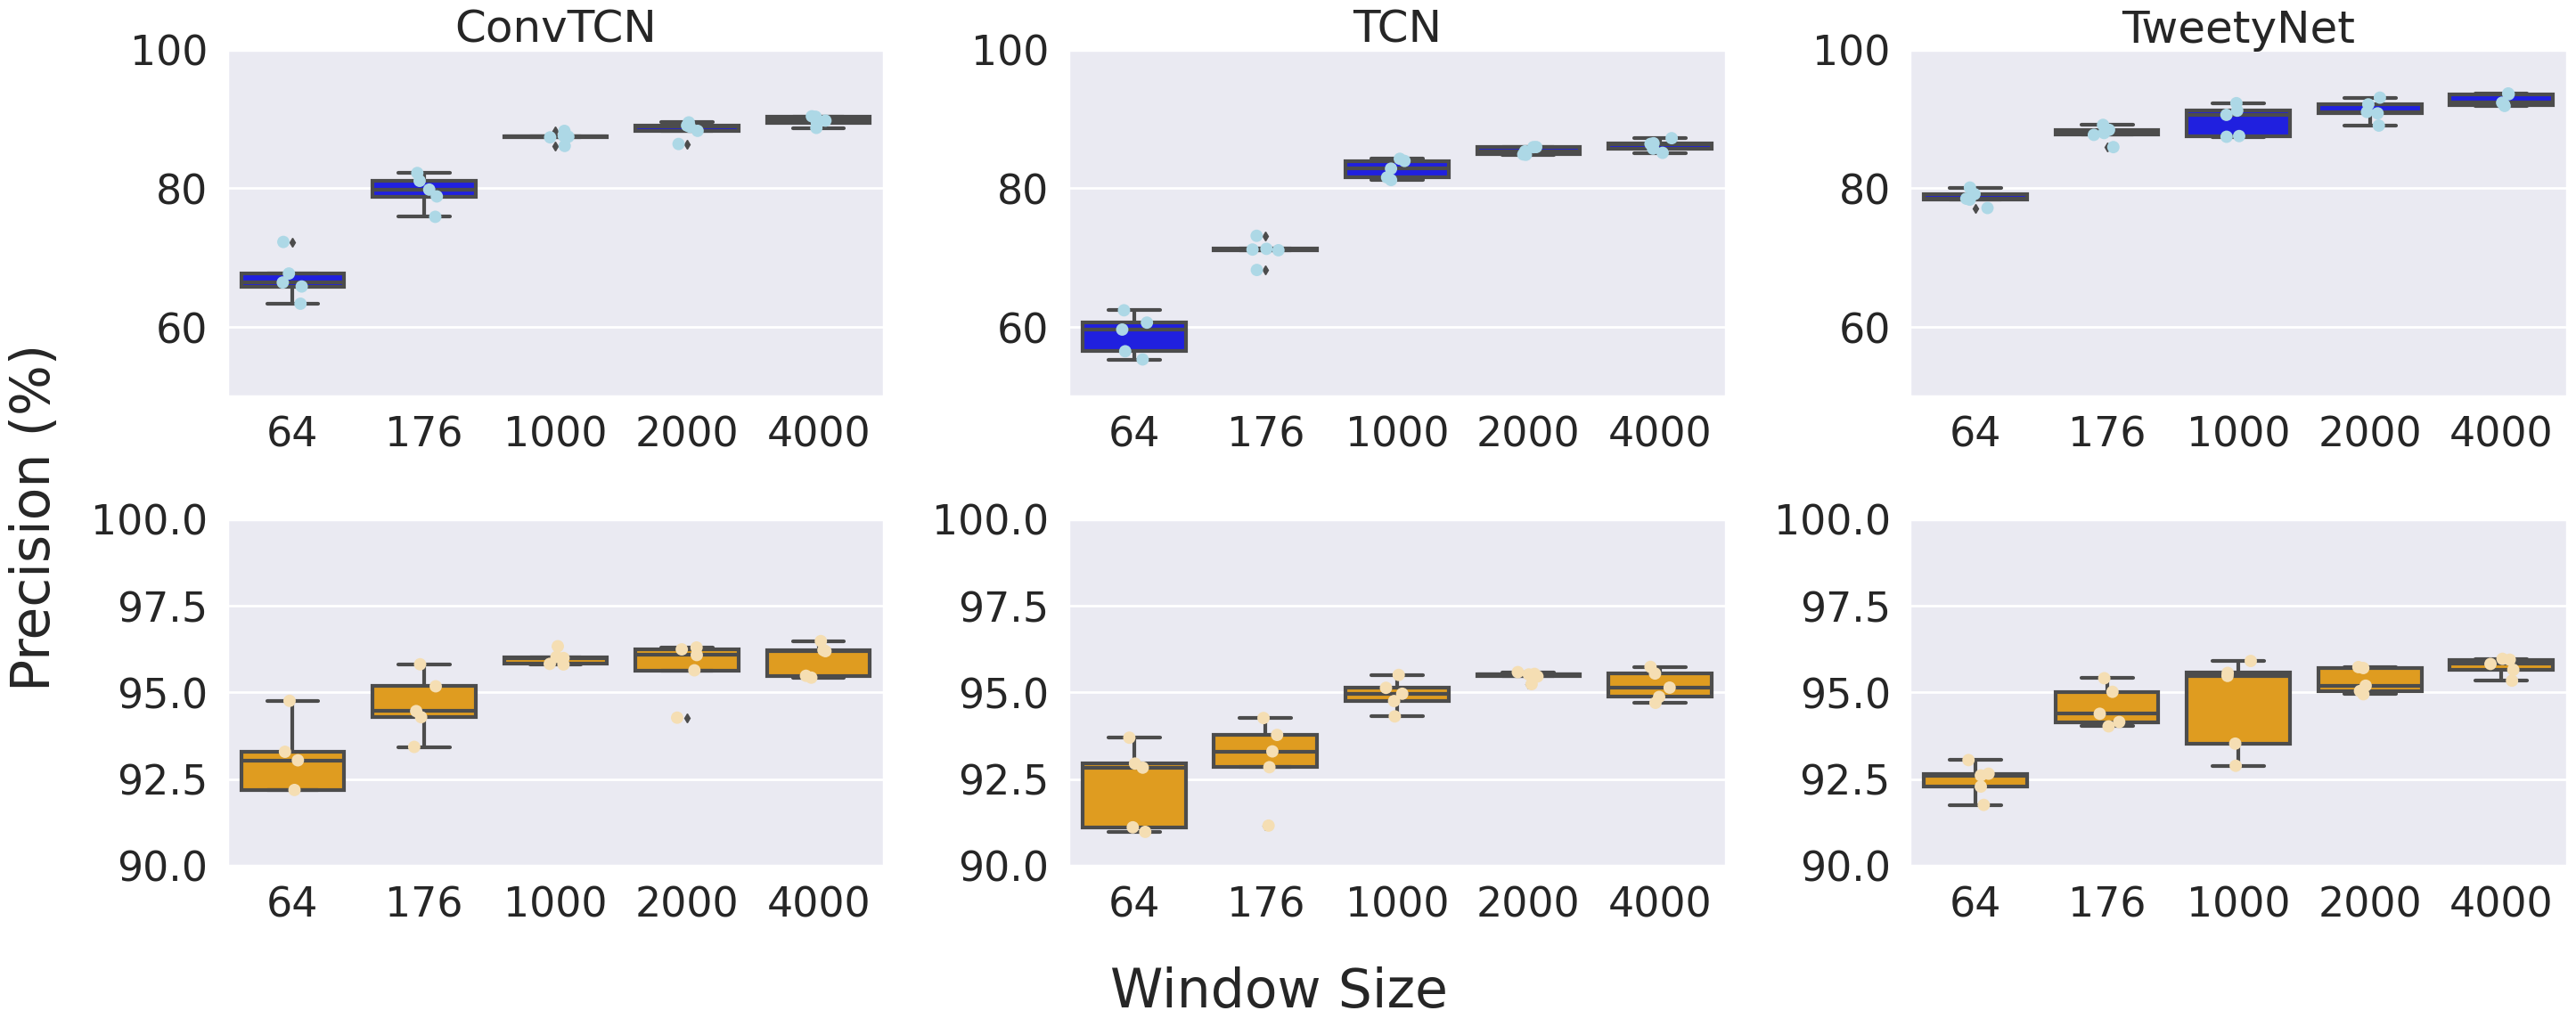

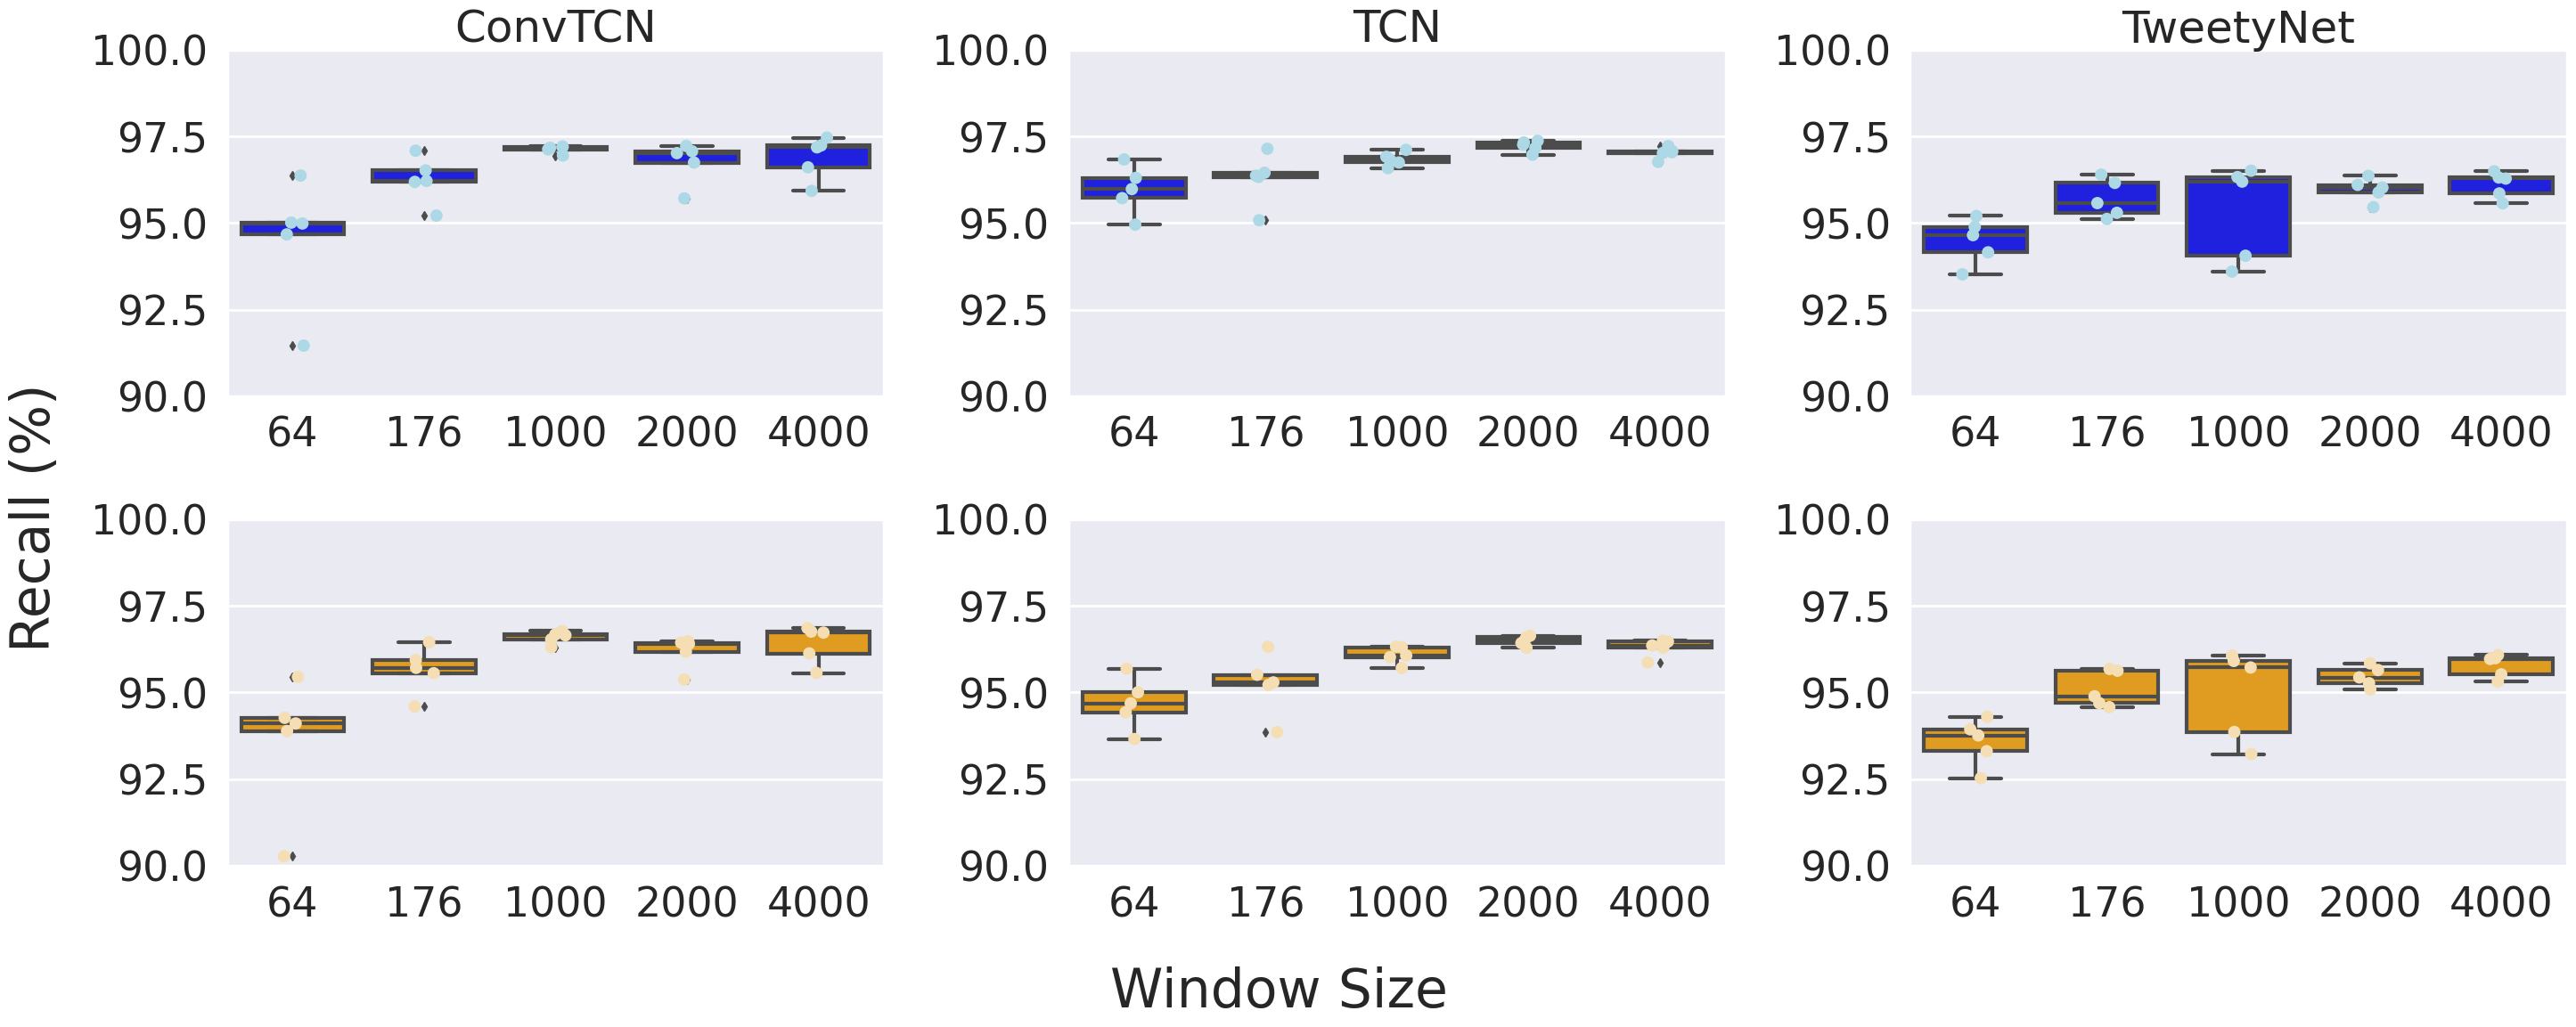

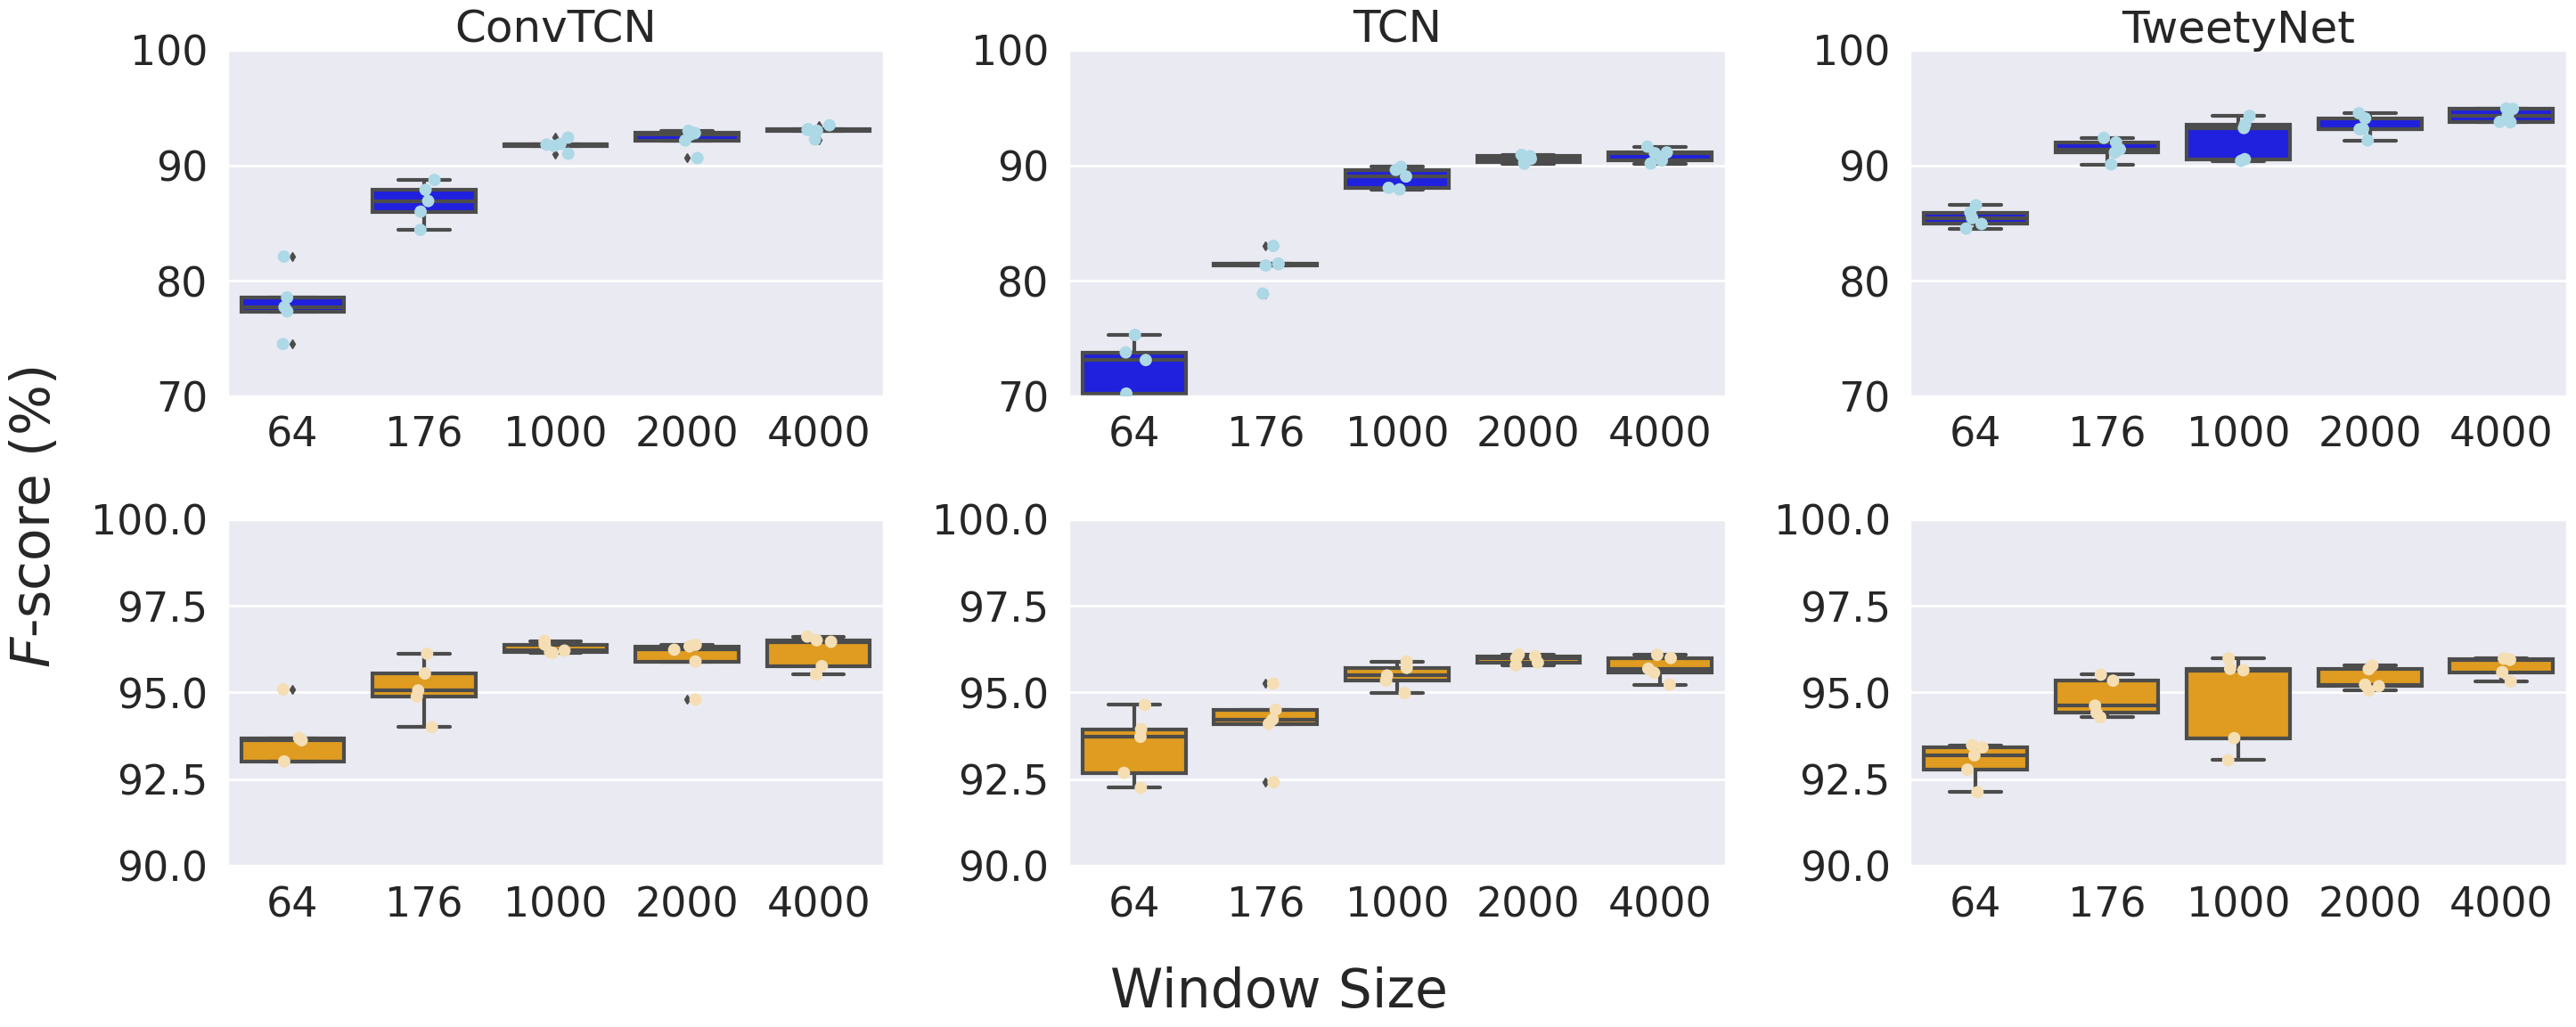

In [8]:
for metrics_plot_num, metrics_plot in enumerate(metrics_plots):
    data_metric = data[data['Metric'] == metrics_plot.metric].copy()
    data_metric['Model'] = data_metric['Model'].map(lambda x: x.replace('TemporalConvNet', 'TCN'))
    data_metric['With Clean-Ups'] = data_metric['Post-processing']

    fig, ax_arr = plt.subplots(2, 3, figsize=(30, 12.5))
    for row_ind, cleanup in enumerate(sorted(data_metric['With Clean-Ups'].unique())):
        for col_ind, model_name in enumerate(sorted(data_metric['Model'].unique())):
            ax = ax_arr[row_ind, col_ind]
            sns.boxplot(
                data_metric[(data_metric['Model'] == model_name) & (data_metric['With Clean-Ups'] == cleanup)],
                y='value',
                x='Window Size',
                ax=ax,
                hue='With Clean-Ups',
                palette={False: 'blue', True: 'orange'}
                
            )
            sns.stripplot(
                data_metric[(data_metric['Model'] == model_name) & (data_metric['With Clean-Ups'] == cleanup)],
                y='value',
                x='Window Size',
                ax=ax,
                hue='With Clean-Ups',
                palette={False: 'lightblue', True: 'wheat'},
                size=10,
            )
            ax.legend().remove()
            ax.set_ylim(metrics_plot.ylims[row_ind])
            ax.set_xlabel('')
            ax.set_ylabel('')
            if row_ind == 0:
                ax.set_title(model_name)
    fig.supylabel(metrics_plot.metric, x=0.025)
    fig.supxlabel('Window Size', y=0.05)
    fig.tight_layout()
    plt.savefig(f'doc/figures/{metrics_plot.save_fname}.svg', bbox_inches="tight")